# 3. Modelo de Regresión lineal

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
df = pd.read_csv("Heart_std.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,1.198363,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,0.699073,-1.113115
1,-0.478484,-1.938163,-1.371957,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,-0.917423,0.898380
2,-1.751359,0.515952,1.198363,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,0.699073,-1.113115
3,-0.584556,-1.938163,-0.086797,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,-0.917423,0.898380
4,0.051881,0.515952,-1.371957,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,0.699073,-1.113115
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.483522,-1.210356,0.596393,-0.551341,-0.749180,-0.188999,-0.823556,0.293283,-0.917423,0.898380
914,1.536902,0.515952,-0.086797,0.627078,-0.053049,1.813758,-0.749180,0.164684,-0.823556,2.357094,-0.917423,0.898380
915,0.370100,0.515952,-0.086797,-0.129513,-0.620168,-0.551341,-0.749180,-0.857069,1.214246,0.293283,-0.917423,0.898380
916,0.370100,-1.938163,1.198363,-0.129513,0.340275,-0.551341,1.733661,1.461525,-0.823556,-0.832432,-0.917423,0.898380


# Separamos la variable target

In [17]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [18]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

y = df["HeartDisease"]


In [19]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,1.198363,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,0.699073
1,-0.478484,-1.938163,-1.371957,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,-0.917423
2,-1.751359,0.515952,1.198363,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,0.699073
3,-0.584556,-1.938163,-0.086797,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,-0.917423
4,0.051881,0.515952,-1.371957,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,0.699073
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.483522,-1.210356,0.596393,-0.551341,-0.749180,-0.188999,-0.823556,0.293283,-0.917423
914,1.536902,0.515952,-0.086797,0.627078,-0.053049,1.813758,-0.749180,0.164684,-0.823556,2.357094,-0.917423
915,0.370100,0.515952,-0.086797,-0.129513,-0.620168,-0.551341,-0.749180,-0.857069,1.214246,0.293283,-0.917423
916,0.370100,-1.938163,1.198363,-0.129513,0.340275,-0.551341,1.733661,1.461525,-0.823556,-0.832432,-0.917423


In [20]:
y

0     -1.113115
1      0.898380
2     -1.113115
3      0.898380
4     -1.113115
         ...   
913    0.898380
914    0.898380
915    0.898380
916    0.898380
917   -1.113115
Name: HeartDisease, Length: 918, dtype: float64

## Separamos los datos en Train y Test

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

### Comprobamos que se ha realizado el train_test_split correctamente

In [22]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (918, 11)
Train features shape: (642, 11)
Train target shape: (642,)
Test features shape: (276, 11)
Test target shape: (276,)


### Creamos y entrenamos nuestro modelo

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [25]:
coeff_df = pd.DataFrame(modelo.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Age,0.055632
Sex,0.140932
ChestPainType,0.003012
RestingBP,0.001587
Cholesterol,-0.153032
FastingBS,0.129339
RestingECG,0.017636
MaxHR,-0.093404
ExerciseAngina,0.235600
Oldpeak,0.226776


### Interpretamos los coeficientes:

Si aumentamos en 1 año la edad, esto repercutirar en una subida de 0.048573 en nuestra variable target; y asi con el resto de variables.

* Podemos observar que la variable "ExerciseAngina" es la que más repercute a la hora de predecir una enfermedad cardíaca (Si a la persona se le ha inducido una angina de pecho es más probable que sufra un episodio cardiovascular)

* Por el contrario, la variable "ST_Slope", que refleja la pendiente que sigue el electrocadiograma después de un latido, si ésta es igual a 1, nuestra varible target bajará en -0.292226. A medida que aumente esta variable, nuestro target subirá, ya que 1 es una valor positivo (Flat ST Slope) mientras que 2 y 3 (Up and Down ST Slope respectivamente) son indicativos de anomalías.

3 - isquemia miocardica = Down

2 - posible isquemia miocardica = Up

1 - Si anomalías = Flat


# Graficamos los resultados para ver si el modelo de regresión lineal es el más indicado para este tipo de problema.

In [26]:
predictions = modelo.predict(X_test)

<h3>Con esta gráfica ya podemos ver que se trata de un problema de clasificación y no de regresión.

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


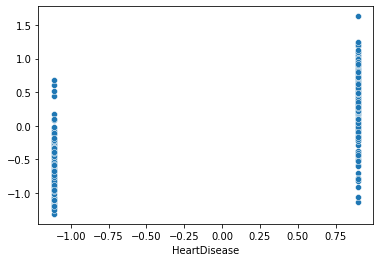

In [27]:
sns.scatterplot(y_test, predictions);

## Sacamos la puntuación de nuestro modelo.

In [28]:
from sklearn import metrics

print("El modelo tiene un porcentaje de acierto del",100*round(modelo.score(X_test, y_test),2),"%")
print("No es un buen modelo")

El modelo tiene un porcentaje de acierto del 48.0 %
No es un buen modelo


In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5605525690343915
MSE: 0.5032743154548897
RMSE: 0.7094182937131588


# Ahora vamos a hacer otro modelo pero con las variables más relevantes:

In [30]:
intercept = modelo.intercept_
features = pd.DataFrame(modelo.coef_, X_train.columns, columns=['coefficient'])
features.sort_values('coefficient', ascending=False)

,coefficient
ExerciseAngina,0.235600
Oldpeak,0.226776
Sex,0.140932
FastingBS,0.129339
Age,0.055632
RestingECG,0.017636
ChestPainType,0.003012
RestingBP,0.001587
MaxHR,-0.093404
Cholesterol,-0.153032


In [31]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [32]:
X = df[['ExerciseAngina', 'Oldpeak','Sex','Age','FastingBS',"ST_Slope","RestingBP"]]

y = df['HeartDisease']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

modelo_2 = LinearRegression(n_jobs=-1) 
modelo_2.fit(X_train, y_train)

print("El modelo tiene un porcentaje de acierto del",round(modelo_2.score(X_test, y_test),2),"%")

predictions = modelo_2.predict(X_test)
predictions

# A little bit lower without Avg. Area Number of Bedrooms
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

El modelo tiene un porcentaje de acierto del 0.51 %
MAE: 0.5669297197830977
MSE: 0.49061221943995825
RMSE: 0.7004371630917068


### Hemos conseguido pasar de un 48% de acierto a un 51%.
### No es una mejora significativa. Con esto podemos concluir diciendo que, en efecto, un modelo de regresión lineal no es la mejor manera de resolver el problema.